In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from collections import namedtuple
from shapely import geometry


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

Software versions
Python 3.8.11 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 4.18.0 372.19.1.el8_6.x86_64 x86_64 with glibc2.17
numpy 1.20.3
matplotlib 3.4.2
xarray 0.19.0
cartopy 0.18.0
scipy 1.7.1
Fri Aug 26 14:17:29 2022 CEST

In [3]:
#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

# Region:

In [5]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion =  Region(
        region_name="Azores_region",
        lonmin=-35., 
        lonmax=-17., 
        latmin=30., 
        latmax=40.
)


# Subregion v02:

In [6]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion_v02 =  Region(
        region_name="Azores_subregion",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)

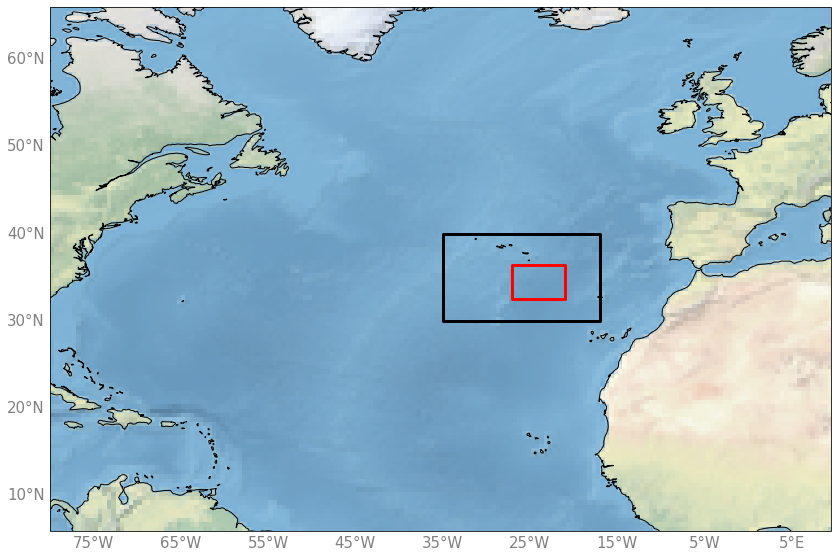

In [9]:
geom = geometry.box(minx=subregion.lonmin, maxx=subregion.lonmax, miny=subregion.latmin, maxy=subregion.latmax)
geom02 = geometry.box(minx=subregion_v02.lonmin, maxx=subregion_v02.lonmax, miny=subregion_v02.latmin, maxy=subregion_v02.latmax)

fig = plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

ax1.add_geometries([geom], crs=cartopy.crs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=3)
ax1.add_geometries([geom02], crs=cartopy.crs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=3, label='Subregion')

ax1.set_xlim([-80., 9.5])
ax1.set_ylim([6., 66.])
    
ax1.coastlines(resolution='50m', color='black', linewidth=1, zorder=50)
ax1.stock_img()

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='-')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator(np.arange(-75, 15, 10))
gl.ylocator = mticker.FixedLocator(np.arange(10, 70, 10))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

plt.savefig('../../Figures/' + 'Map_regions_Azores.jpg', dpi=300)

plt.show()
plt.close()

    